In [1]:
# Import the required modules.

import numpy as np
import pandas as pd
import json
import cv2
import os
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec

from imutils import perspective
from imutils import contours
import imutils

%matplotlib inline

In [2]:
# Set a start point to remove the non-tag tool results.
preset = 5087

# Read in the zooniverse classifications.
data = pd.read_csv('astro-ecology-classifications.csv')[preset:]
data

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
5087,135872963,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:30:41 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26793143"":{""retired"":{""id"":23500958,""workflo...",26793143
5088,135872977,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:30:44 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26793399"":{""retired"":{""id"":23502221,""workflo...",26793399
5089,135873070,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:31:21 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26795947"":{""retired"":{""id"":23503609,""workflo...",26795947
5090,135873112,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:31:41 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26793713"":{""retired"":{""id"":23502754,""workflo...",26793713
5091,135873216,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:32:09 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26783731"":{""retired"":{""id"":23494735,""workflo...",26783731
5092,135873330,RossMcWhirter,1813215.0,1a400102c1fc2a1080f9,7916,Knowsley Safari rhino enclosure,67.165,2018-12-10 17:32:50 UTC,NaN,NaN,"{""source"":""api"",""session"":""dd0eff20c2f11dc45f8...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26779470"":{""retired"":{""id"":23493112,""workflo...",26779470
5093,136008029,Philipk,1438362.0,3017bb70bdd42e0ef4ed,7916,Knowsley Safari rhino enclosure,67.165,2018-12-11 06:53:26 UTC,NaN,NaN,"{""source"":""api"",""session"":""2a7609d426d2217a071...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26779619"":{""retired"":{""id"":23493373,""workflo...",26779619
5094,136008100,Philipk,1438362.0,3017bb70bdd42e0ef4ed,7916,Knowsley Safari rhino enclosure,67.165,2018-12-11 06:55:07 UTC,NaN,NaN,"{""source"":""api"",""session"":""2a7609d426d2217a071...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26779988"":{""retired"":{""id"":23493995,""workflo...",26779988
5095,136008153,Philipk,1438362.0,3017bb70bdd42e0ef4ed,7916,Knowsley Safari rhino enclosure,67.165,2018-12-11 06:55:43 UTC,NaN,NaN,"{""source"":""api"",""session"":""2a7609d426d2217a071...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26726832"":{""retired"":{""id"":23448827,""workflo...",26726832
5096,136008159,Philipk,1438362.0,3017bb70bdd42e0ef4ed,7916,Knowsley Safari rhino enclosure,67.165,2018-12-11 06:55:47 UTC,NaN,NaN,"{""source"":""api"",""session"":""2a7609d426d2217a071...","[{""task"":""T0"",""task_label"":""Use the tools belo...","{""26807153"":{""retired"":{""id"":23507438,""workflo...",26807153


In [3]:
# Open a set of lists to store import classification data.
classification_id = []
filename = []
tool_label = []
tool = []
x = []
y = []

# Run through each of the rows and extract every tagged coordinate and associated class.
for i in range(len(data)):
    place = i+preset
    for j in range(len(json.loads(data.annotations[place])[0]['value'])):
        classification_id.append(data.classification_id[place])
        filename.append(json.loads(data.subject_data[place])[str(data.subject_ids[place])]['Filename'][:-4] + '.png')
        index = json.loads(data.annotations[place])[0]['value'][j]
        tool_label.append(index['tool_label'])
        tool.append(index['tool'])
        x.append(index['x'])
        y.append(index['y'])

In [4]:
# Turn the lists into a pandas dataframe.
df = pd.DataFrame({'classification_id': classification_id, 'filename': filename, 'tool_label': tool_label, 'tool': tool, 'x': x, 'y': y}, columns=['classification_id','filename','tool_label','tool','x','y'])

In [5]:
# Perform some maintenance to change labels to be equal to names file.
df = df[df['tool'] < 3]
df.loc[df['tool'] == 0, 'tool'] = 4
df.loc[df['tool'] == 2, 'tool'] = 3
df.loc[df['tool'] == 1, 'tool'] = 2
df.sort_values(by=['filename'])
df.index = range(len(df))
df

,classification_id,filename,tool_label,tool,x,y
0,135872963,20180412_01_01_0185.png,Rhino,4,331.984375,278.000000
1,135872963,20180412_01_01_0185.png,Rhino,4,358.984375,280.000000
2,135873070,20180412_02_01_0116.png,Rhino,4,236.984375,264.000000
3,135873070,20180412_02_01_0116.png,Rhino,4,306.984375,273.000000
4,135873070,20180412_02_01_0116.png,Antelope,2,293.984375,335.000000
5,135873070,20180412_02_01_0116.png,Antelope,2,356.984375,340.000000
6,135873070,20180412_02_01_0116.png,Antelope,2,482.984375,344.000000
7,135873070,20180412_02_01_0116.png,Antelope,2,372.984375,341.000000
8,135873070,20180412_02_01_0116.png,Rhino,4,322.984375,266.000000
9,135873112,20180412_01_01_0682.png,Rhino,4,297.984375,124.000000


In [6]:
k = 30000

targ = df.filename[k]

# Read in the images for creating bounding boxes from coordinate tags.
img = cv2.imread(os.path.join('F:\\Documents\\PostDoc\\know_fusion_images', targ))

In [7]:
# Convert into grayscale and into a numpy array.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)

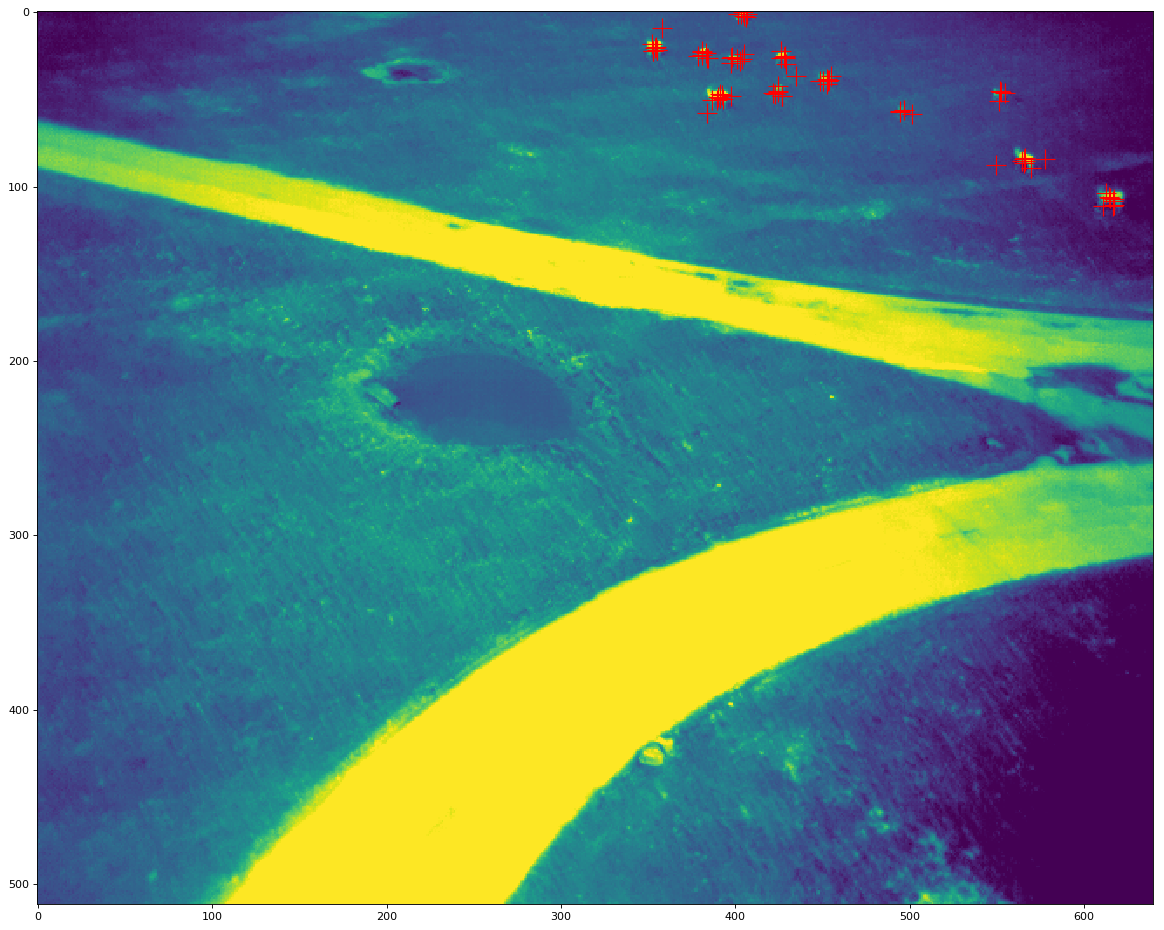

In [8]:
# Plot the image and show the tagged coordinates as crosshairs.
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)

labs = df[df.filename == df.filename[k]]
labs.index = range(len(labs))
for i in range(len(labs)):
    plt.plot(labs.x[i], labs.y[i], 'b+', color='red', markersize = 18)

In [9]:
# For each of the tags, cut out a 20 by 20 pixel region centred on them.

x_t = []
y_t = []
b_t = []

cut = 255 - img

for i in range(len(labs)):
    
    # Get the coordinates of the maximum pixel in the 20x20 pixel region.
    
    xx = np.repeat(np.power(range(640) - labs.x[i], 2.0)[np.newaxis,:], 512, 0)
    
    yy = np.repeat(np.power(range(512) - labs.y[i], 2.0)[np.newaxis,:], 640, 0).transpose()
    
    xy = np.sqrt(xx + yy)
    
    fin = 255 * (xy / np.max(xy))
    
    both = 0.9*fin + 0.1*cut
    
    #dist = np.sqrt(np.power(range(640) - labs.x[i], 2.0) + np.power(range(512) - labs.y[i], 2.0))
    
    x_c = np.where(both == np.amin(both))[0][0]
    y_c = np.where(both == np.amin(both))[1][0]
    
    #dist = np.sqrt(np.power(x_c-cut_reg, 2.0) + np.power(y_c-cut_reg, 2.0))
    #mindist = np.where(dist == np.amin(dist))[0][0]
    
    #x_r = int(round(labs.x[i]-cut_reg))+x_c[mindist]
    #y_r = int(round(labs.y[i]-cut_reg))+y_c[mindist]
    
    #print(x_c[mindist])

    x_t.append(y_c)
    y_t.append(x_c)
    b_t.append(img[x_c, y_c])

C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

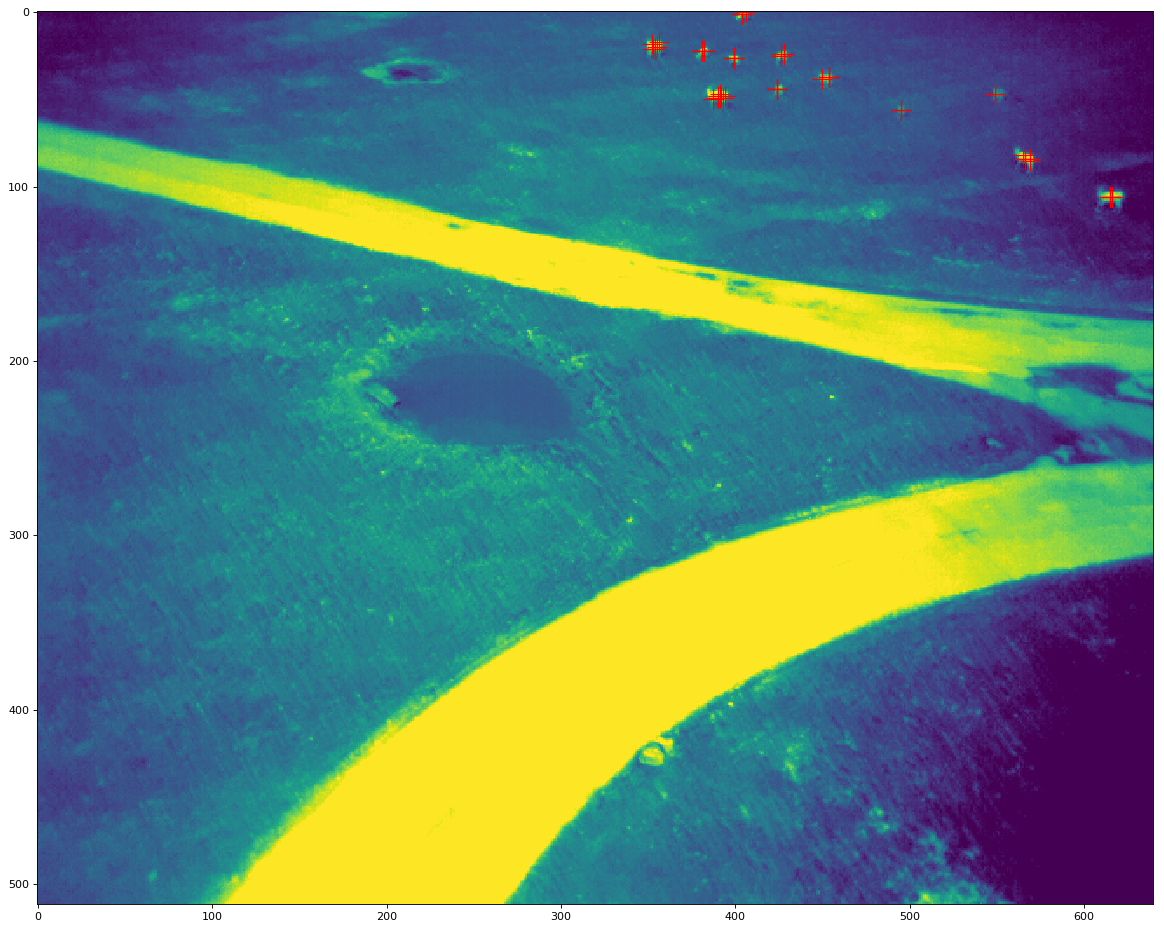

In [10]:
labs['x_t'] = pd.Series(x_t)
labs['y_t'] = pd.Series(y_t)
labs['b_t'] = pd.Series(b_t)

# Plot the image and show the tagged coordinates as crosshairs.
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)

for i in range(len(labs)):
    plt.plot(labs.x_t[i], labs.y_t[i], 'b+', color='red', markersize = 18)

In [11]:
# For each classified image, work out the boxes for each of the tags.

unique_class = np.unique(labs['classification_id'])

for j in range(len(unique_class)):
    labset = labs[labs.classification_id == unique_class[j]]
    labset.sort_values(by=['x'])
    labset.index = range(len(labset))
    
    # Find the boxes.
    
    x_min = []
    x_max = []
    y_min = []
    y_max = []
    
    for k in range(len(labset)):
        
        x_cand_1 = labset.x_t[k]
        x_cand_2 = labset.x_t[k]
        y_cand_1 = labset.y_t[k]
        y_cand_2 = labset.y_t[k]
        
        #for z in range(1):
        
        #x_s_1 = img[:x_cand_1+1,y_cand_1][::-1]
        #x_s_2 = img[x_cand_1:,y_cand_1]
        
        #x_cand_1 = x_cand_1 - np.where(x_s_1 < 127)[0][0]
        #x_cand_2 = x_cand_2 + np.where(x_s_2 < 127)[0][0]
        
        #y_s_1 = img[x_cand_1,:y_cand_1+1][::-1]
        #y_s_2 = img[x_cand_2,y_cand_2:]
        
        #y_s_1 = img[labset.x_t[k],:y_cand_1+1][::-1]
        #y_s_2 = img[labset.x_t[k],y_cand_2:]
        
        #y_cand_1 = y_cand_1 - np.where(y_s_1 < 127)[0][0]
        #y_cand_2 = y_cand_2 + np.where(y_s_2 < 127)[0][0]
            
        #x_min.append(x_cand_1 - np.where(x_s_1 < 127)[0][0])
        #x_max.append(x_cand_2 + np.where(x_s_2 < 127)[0][0])
        
        #y_min.append(y_cand_1 - np.where(y_s_1 < 127)[0][0])
        #y_max.append(y_cand_2 + np.where(y_s_2 < 127)[0][0])
        
        x_min.append(x_cand_1 - 5)
        x_max.append(x_cand_2 + 5)
        
        y_min.append(y_cand_1 - 5)
        y_max.append(y_cand_2 + 5)
        
    labset['x_min'] = x_min
    labset['x_max'] = x_max
    labset['y_min'] = y_min
    labset['y_max'] = y_max
    
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    #plt.imshow(img)
    
    #fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    #gs  = gridspec.GridSpec(1, 1, height_ratios=[1])
    #ax = plt.subplot(gs[0])

    # Display the image
    #ax.imshow(img)
    
    #for k in range(len(labset)):
    #    rect = patches.Rectangle((x_min[k],y_min[k]),x_max[k]-x_min[k],y_max[k]-y_min[k],linewidth=1,edgecolor='r',facecolor='none')
    #    ax.add_patch(rect)

C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ross\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

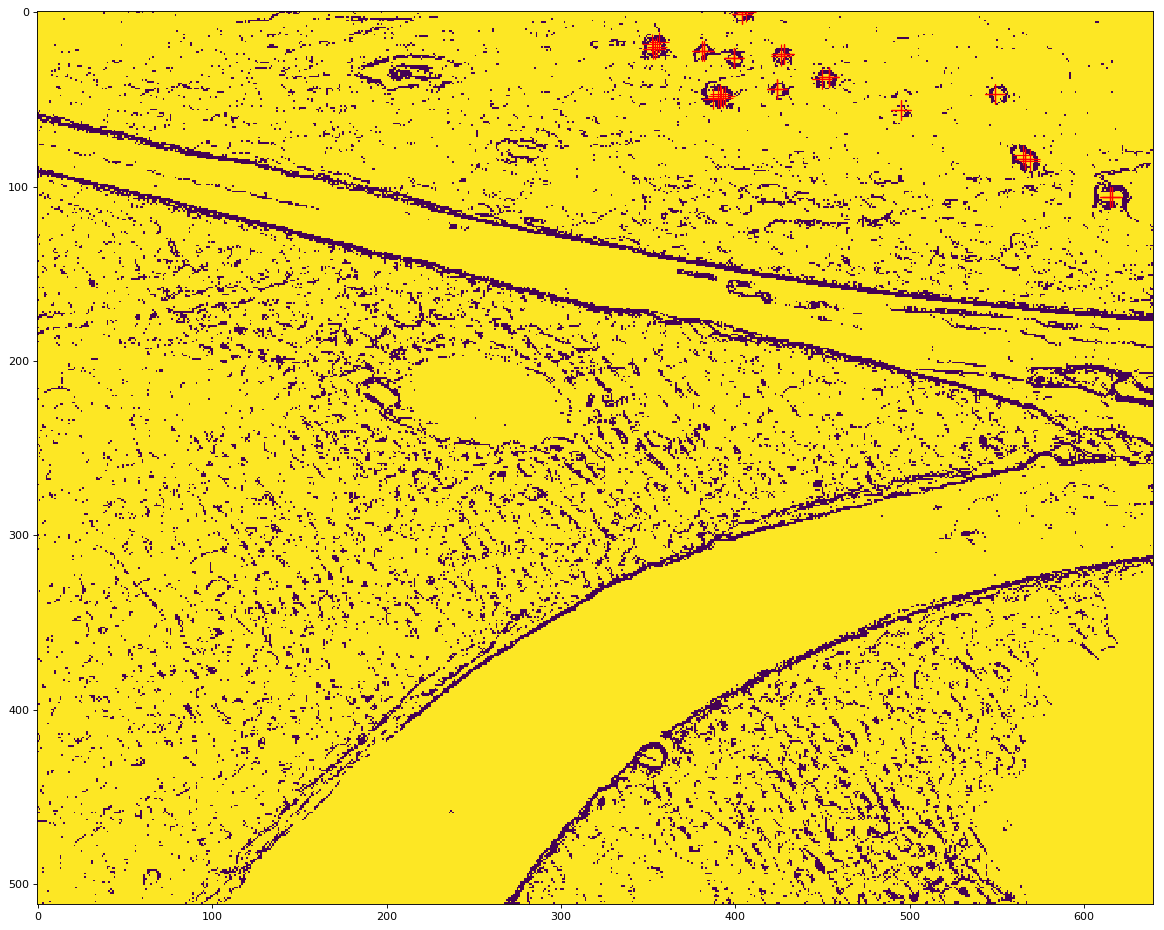

In [12]:
k = 150000

img = cv2.imread(os.path.join('F:\\Documents\\PostDoc\\know_fusion_images', targ))
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)

sizey, sizex = img.shape

rang = 5
os = 2

th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,rang,os)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(th)

for i in range(len(labs)):
    plt.plot(labs.x_t[i], labs.y_t[i], 'b+', color='red', markersize = 18)

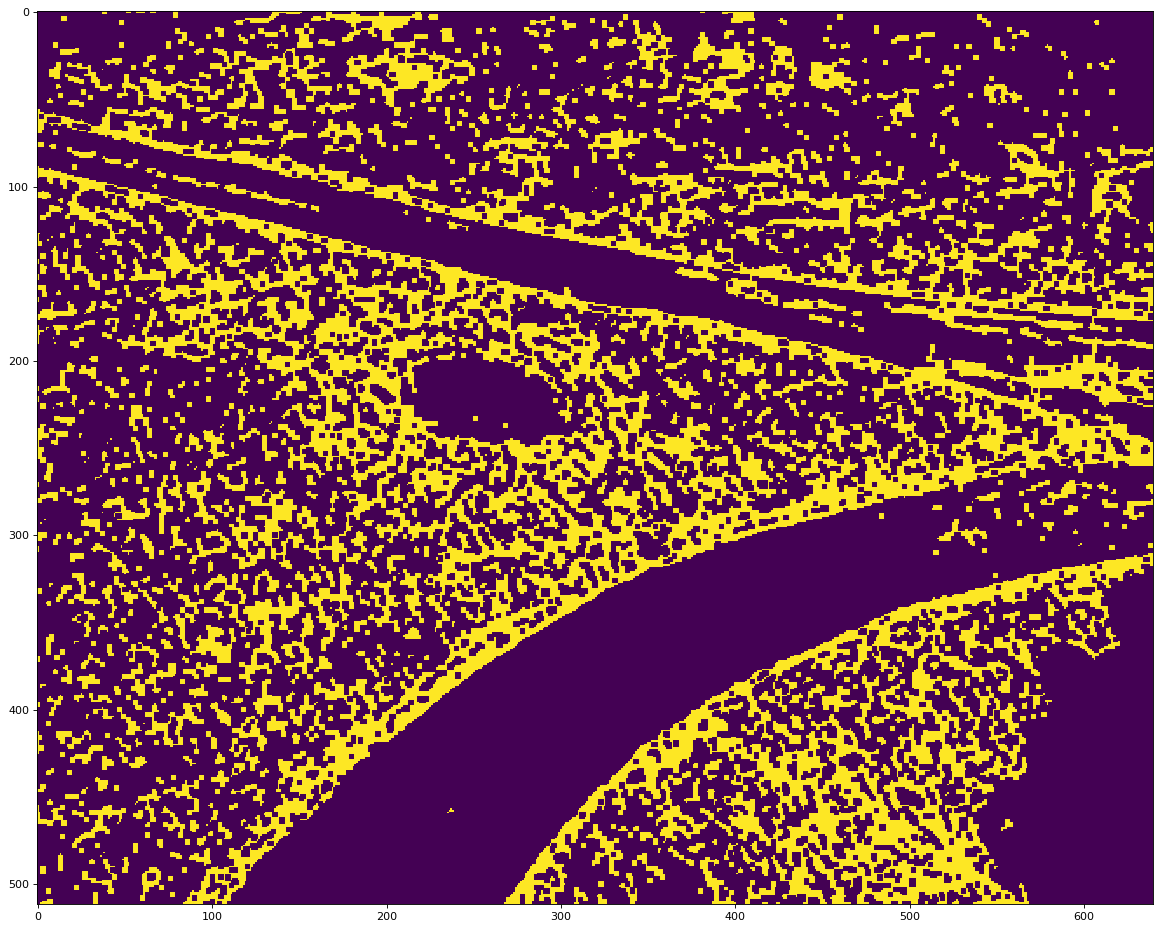

In [13]:
image = th
image = cv2.bitwise_not(image)

edged = cv2.Canny(image, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(edged)

cnts = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [14]:
cv2.drawContours(th, cnts, 0, (0, 255, 0), -1)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2509: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [ ]:
(cnts, _) = contours.sort_contours(cnts)

In [ ]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

areas = []

box_x = []
box_y = []
box_w = []
box_h = []

for c in cnts:

    areas.append(cv2.contourArea(c))

    orig = img.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    box = perspective.order_points(box)

    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    x, y, w, h = cv2.boundingRect(c)
    
    box_x.append(x)
    box_y.append(y)
    box_w.append(w)
    box_h.append(h)

In [ ]:
# Turn the lists into a pandas dataframe.
boxes = pd.DataFrame({'x': box_x, 'y': box_y, 'w': box_w, 'h': box_h}, columns=['x','y','w','h'])

boxes['a'] = boxes['w'] * boxes['h']

boxes = boxes[boxes['a'] < 1000]

boxes['keep'] = 0

boxes.index = range(len(boxes))

# Reject boxes without a tag inside.

for i in range(len(labs)):
    for j in range(len(boxes)):
        if (boxes['x'][j] <= labs.x_t[i] and (boxes['x'][j]+boxes['w'][j]) >= labs.x_t[i] and boxes['y'][j] <= labs.y_t[i] and (boxes['y'][j]+boxes['h'][j]) >= labs.y_t[i]):
            boxes['keep'][j] = 1
            
            
boxes = boxes[boxes['keep'] == 1]

boxes.index = range(len(boxes))

labs['empty'] = 0

boxfin = []

for i in range(len(labs)):
    boxlabs = boxes
    boxlabs['keep'] = 0
    for j in range(len(boxlabs)):
        if (boxlabs['x'][j] <= labs.x_t[i] and (boxlabs['x'][j]+boxlabs['w'][j]) >= labs.x_t[i] and boxlabs['y'][j] <= labs.y_t[i] and (boxlabs['y'][j]+boxlabs['h'][j]) >= labs.y_t[i]):
            boxlabs['keep'][j] = 1
            
    boxlabs = boxlabs[boxlabs['keep'] == 1]
    
    if boxlabs.empty:
        labs['empty'][i] = 1
    else:
        boxlabs = boxlabs[boxlabs['a'] == np.amax(boxlabs['a'].values)]
        
        boxlabs.index = range(len(boxlabs))
    
        boxlabs = boxlabs.iloc[[0]]
        
        boxfin.append(boxlabs)
    
boxfin = pd.concat(boxfin)

boxfin.index = range(len(boxfin))
        
labs = labs[labs['empty'] == 0]

labs.index = range(len(labs))

# Now that we have a dataframe of labels and a dataframe of associated maxsize boxes, compute unique and aggregate.

boxuni = boxfin.drop_duplicates()

boxuni.index = range(len(boxuni))

tool_final = []

tool_label_final = []

for i in range(len(boxuni)):
    
    duplicates = (boxfin[(boxfin['x'] == boxuni['x'][i]) & (boxfin['y'] == boxuni['y'][i]) & (boxfin['w'] == boxuni['w'][i]) & (boxfin['h'] == boxuni['h'][i])].index.values)

    tool_final.append(labs.iloc[duplicates].tool.max())
    
    tool_label_final.append(labs.iloc[duplicates].tool_label.max())

boxuni['tool_final'] = tool_final

boxuni['tool_label_final'] = tool_label_final

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(1, 1, height_ratios=[1])
ax = plt.subplot(gs[0])

# Display the image
ax.imshow(img)

#for i in range(len(labs)):
#    plt.plot(labs.x_t[i], labs.y_t[i], 'b+', color='red', markersize = 18)
    
for i in range(len(boxuni)):
    rect = patches.Rectangle((boxuni['x'][i],boxuni['y'][i]),boxuni['w'][i],boxuni['h'][i],linewidth=4,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [ ]:
print(boxuni)

In [ ]:
len(list(set(filename)))